In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Avoid the k-Means memory leak in multi-threaded environments
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [24]:
seg_df = pd.read_csv("customer_segmentation.csv")

In [25]:
df = seg_df.drop(['CustomerID', 'FullName', 'OrderConfirmationTime', 'Recency', 'Frequency', 'Monetary Value', 'R_rank_norm', 'F_rank_norm', 'M_rank_norm', 'Customer Segment'], 
    axis = 1)
df.head()

,Gender,Age,CreditScore,MonthlyIncome,Country,RFM_Score
0,Male,57,780,7591,China,3.68
1,Female,69,746,3912,China,3.83
2,Female,21,772,7460,UK,1.24
3,Female,67,631,4765,UK,3.61
4,Male,57,630,3268,China,1.24


In [26]:
# Labeling categorical data for training the model
label = LabelEncoder()
df_labeled = df
n = 0

# Printing the labels assigned to each category for future reference
for i in df.drop(['Age', 'CreditScore', 'MonthlyIncome', 'RFM_Score'], axis=1):
    df_labeled[i] = label.fit_transform(df_labeled[i].astype('str'))
    mapping = {l: x for x, l in enumerate(label.classes_)}
    print(mapping)

{'Female': 0, 'Male': 1}
{'Australia': 0, 'Canada': 1, 'China': 2, 'India': 3, 'Italy': 4, 'Japan': 5, 'Spain': 6, 'UK': 7, 'USA': 8}


In [27]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_labeled)
df_scaled = pd.DataFrame(df_scaled, columns = df_labeled.columns)
df_scaled

,Gender,Age,CreditScore,MonthlyIncome,Country,RFM_Score
0,1.043559,0.749246,1.736963,1.382881,-0.704129,0.933772
1,-0.958259,1.489322,1.073992,-1.157051,-0.704129,1.053118
2,-0.958259,-1.470982,1.580970,1.292441,1.249227,-1.007594
3,-0.958259,1.365976,-1.168411,-0.568151,1.249227,0.878077
4,1.043559,0.749246,-1.187911,-1.601660,-0.704129,-1.007594
...,...,...,...,...,...,...
1098,-0.958259,-1.470982,-0.700432,-0.254025,-0.704129,0.893990
1099,-0.958259,-0.607560,-1.519396,-0.441811,-1.094800,1.785108
1100,1.043559,-0.545887,-1.051416,0.185061,-0.704129,1.037205
1101,-0.958259,-0.854252,-1.402401,-1.444942,-0.704129,-0.697294


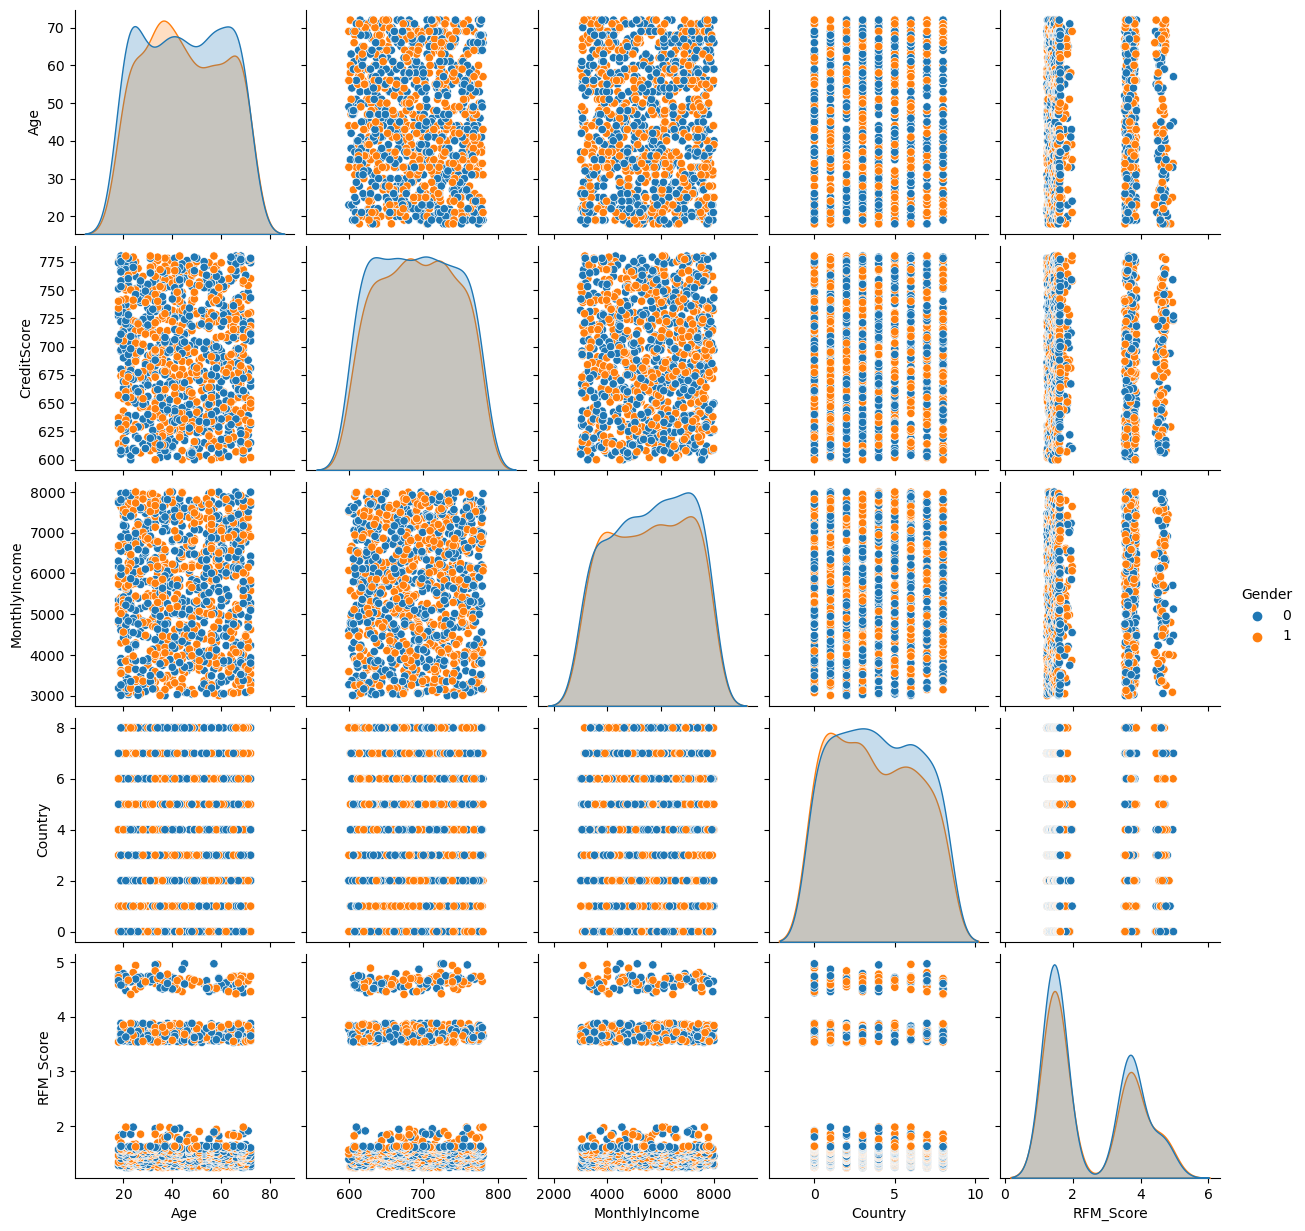

In [28]:
sns.pairplot(df,hue='Gender')

<Axes: >

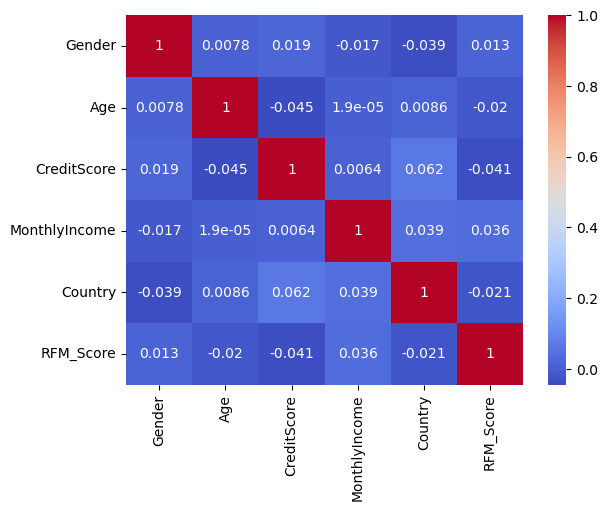

In [29]:
sns.heatmap(df_scaled.corr(),annot=True,cmap='coolwarm') # We can see the features are hardly correlated

In [30]:
#Dimensionality reduction to 3 with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_scaled)
PCA_df = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))

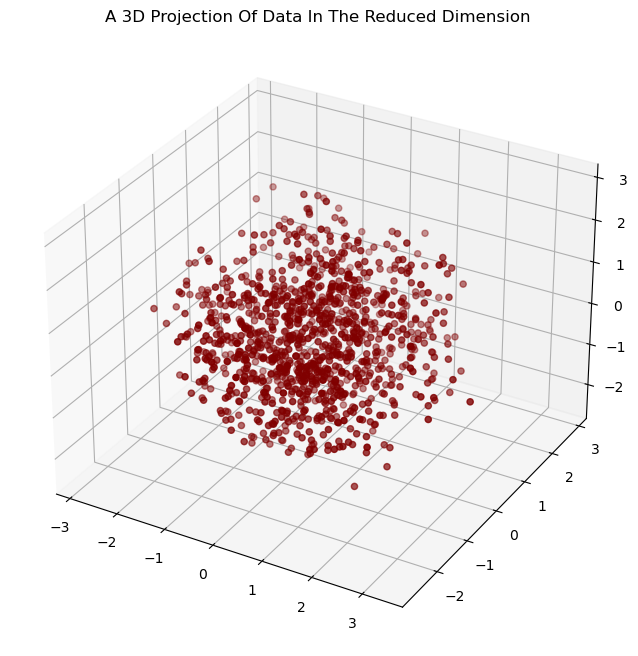

In [31]:
#A 3D Projection Of Data In The Reduced Dimension
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

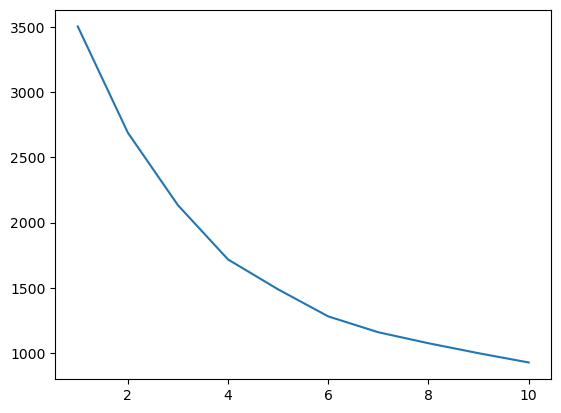

In [32]:
# Elbow method for 

intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(PCA_df)
    intertia_scores.append(kmeans.inertia_)

plt.plot(range(1,11),intertia_scores)

In [33]:
cluster = KMeans(n_clusters=4)
cluster.fit(PCA_df)

PCA_df['Clusters'] = cluster.labels_
df['Clusters'] = cluster.labels_
df.head()

,Gender,Age,CreditScore,MonthlyIncome,Country,RFM_Score,Clusters
0,1,57,780,7591,2,3.68,2
1,0,69,746,3912,2,3.83,1
2,0,21,772,7460,7,1.24,0
3,0,67,631,4765,7,3.61,3
4,1,57,630,3268,2,1.24,1


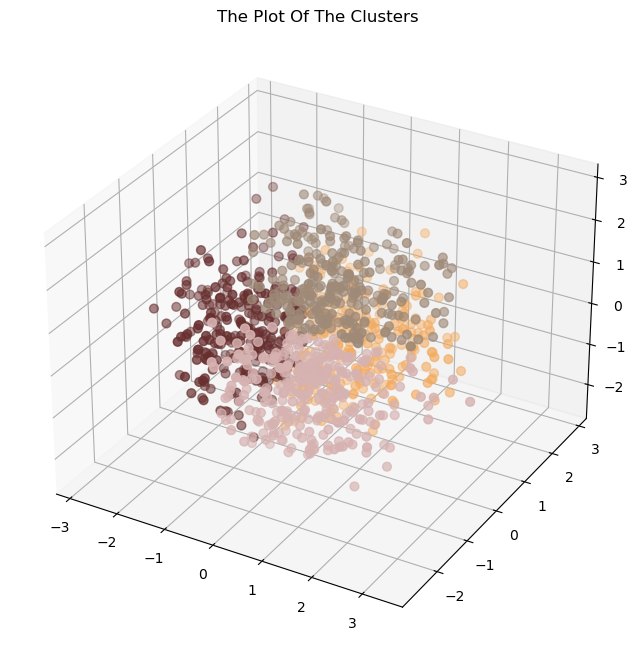

In [34]:
#Plotting the clusters
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

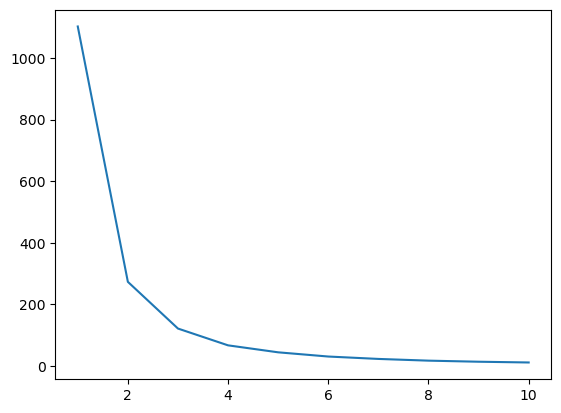

In [35]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled[['MonthlyIncome']])
    intertia_scores.append(kmeans.inertia_)

plt.plot(range(1,11),intertia_scores)

In [36]:
# Elbow method shows us that number of clusters should be 4

In [37]:
income_cluster = KMeans(n_clusters=4)
income_cluster.fit(df_scaled[['MonthlyIncome']])
df_scaled['Income Clusters'] = income_cluster.labels_
df_scaled.head()

,Gender,Age,CreditScore,MonthlyIncome,Country,RFM_Score,Income Clusters
0,1.043559,0.749246,1.736963,1.382881,-0.704129,0.933772,0
1,-0.958259,1.489322,1.073992,-1.157051,-0.704129,1.053118,1
2,-0.958259,-1.470982,1.580970,1.292441,1.249227,-1.007594,0
3,-0.958259,1.365976,-1.168411,-0.568151,1.249227,0.878077,3
4,1.043559,0.749246,-1.187911,-1.601660,-0.704129,-1.007594,1


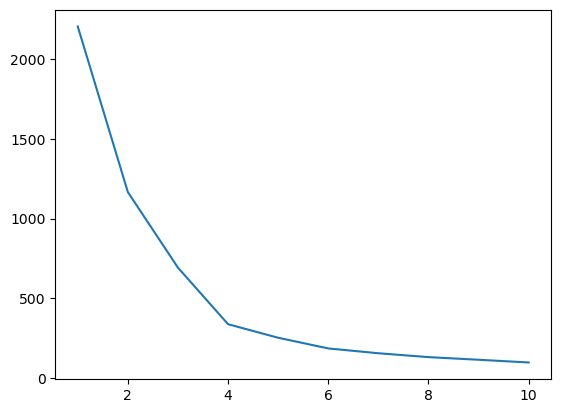

In [38]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df_scaled[['MonthlyIncome','RFM_Score']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [39]:
income_rfm_cluster = KMeans(n_clusters=4)
income_rfm_cluster.fit(df_scaled[['MonthlyIncome', 'RFM_Score']])
df_scaled['Income and RFM Clusters'] = income_rfm_cluster.labels_
df_scaled.head()

,Gender,Age,CreditScore,MonthlyIncome,Country,RFM_Score,Income Clusters,Income and RFM Clusters
0,1.043559,0.749246,1.736963,1.382881,-0.704129,0.933772,0,2
1,-0.958259,1.489322,1.073992,-1.157051,-0.704129,1.053118,1,0
2,-0.958259,-1.470982,1.580970,1.292441,1.249227,-1.007594,0,1
3,-0.958259,1.365976,-1.168411,-0.568151,1.249227,0.878077,3,0
4,1.043559,0.749246,-1.187911,-1.601660,-0.704129,-1.007594,1,3


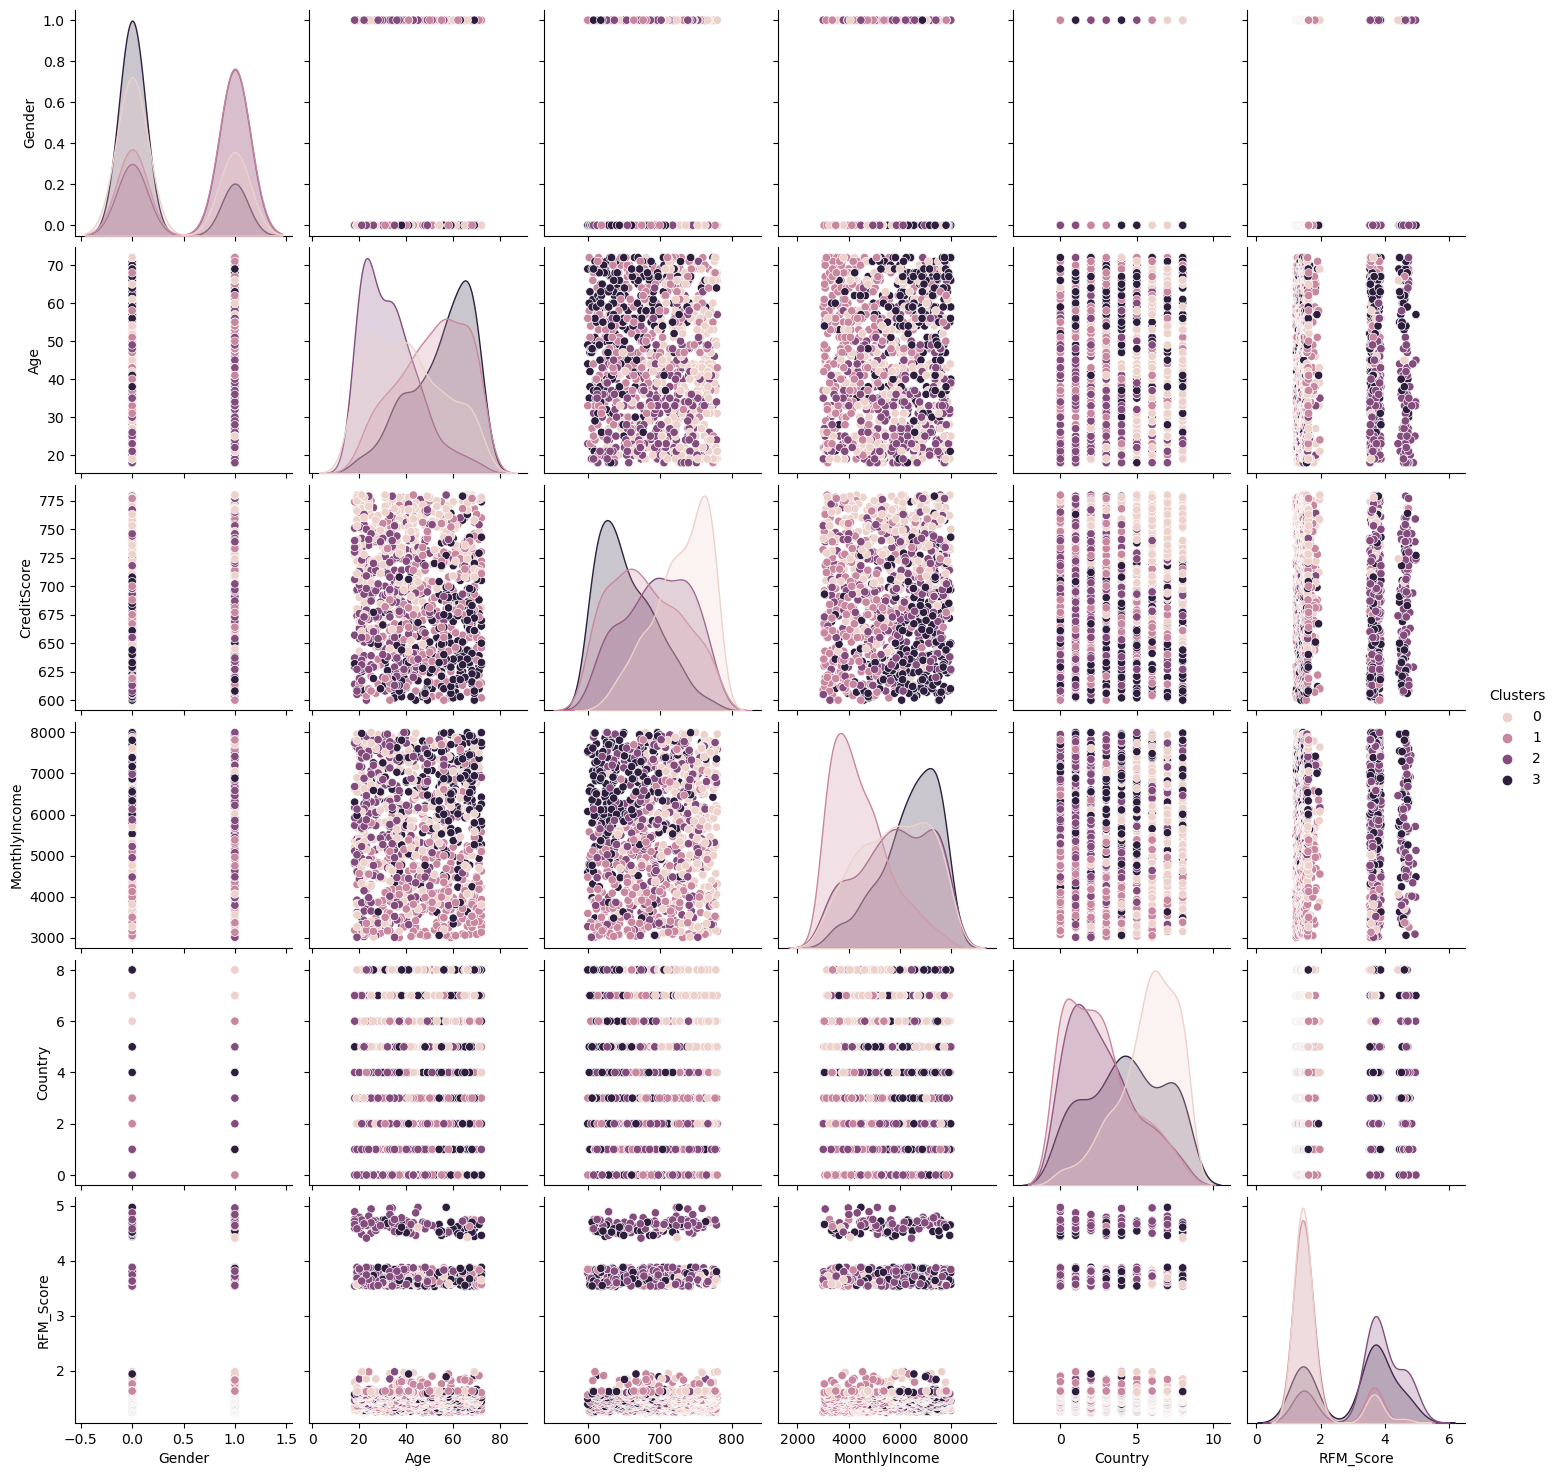

In [40]:
sns.pairplot(df,hue='Clusters')

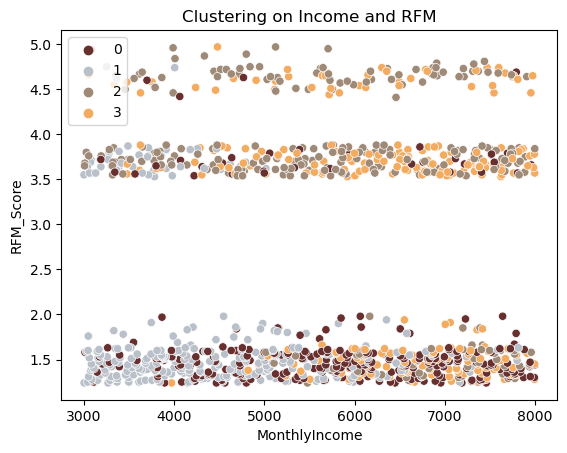

In [41]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

sp = sns.scatterplot(data = df, x='MonthlyIncome', y = 'RFM_Score', hue = 'Clusters', palette=pal)
sp.set_title('Clustering on Income and RFM')
plt.legend()
plt.show()

- Cluster 0 : High Income, Low Spending Score
- Cluster 1 : Lower Income, Low Spending Score
- Cluster 2 : Average Income, High Spending Score
- Cluster 3 : High Income, High Spending Score

<Axes: xlabel='Clusters', ylabel='RFM_Score'>

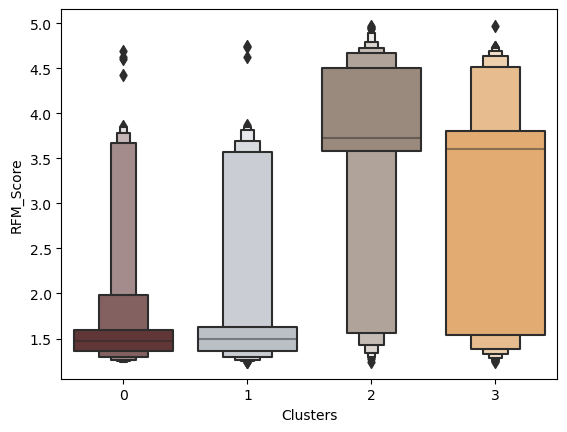

In [42]:
sns.boxenplot(x=df["Clusters"], y=df["RFM_Score"], palette=pal)

Cluster 3 has the most clients, and Cluster 2 seconds it

<Axes: xlabel='Age', ylabel='RFM_Score'>

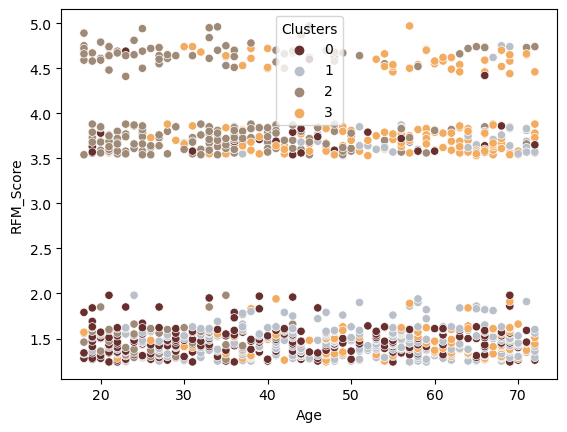

In [43]:
sns.scatterplot(data = df, x='Age', y = 'RFM_Score', hue = 'Clusters', palette=pal)

In [48]:
df[['CustomerID', 'FullName']] = seg_df[['CustomerID', 'FullName']]

# - Cluster 0 : High Income, Low Spending Score
# - Cluster 1 : Lower Income, Low Spending Score
# - Cluster 2 : Average Income, High Spending Score
# - Cluster 3 : High Income, High Spending Score

def segment(x):
    if x == 0:
        return "High Income, Low Spending Score"
    elif x == 1 :
        return "Lower Income, Low Spending Score"
    elif x == 2:
        return "Average Income, High Spending Score"
    else:
        return "High Income, High Spending Score"

df['Clusters'] = df['Clusters'].apply(segment)

df.to_csv("clustered_customers.csv", index=False)